# Computational Physics
*Cai Hao         
hcai@whu.edu.cn       
13720347981*

# Chapter 1 A First Numerical Problem

- Ordinary differential equations --> projetile motion, harmonic motion, celestial mechanics ... ...

<img src="http://i4.piimg.com/567571/7069c160cc6e6907.png" width=60%/>

<img src="http://i4.piimg.com/567571/bee6e97e7663b176.png" width=60%/>

<img src="http://i4.piimg.com/567571/9d692c43557fd044.png" width=60%/>

- No prior experience? No problem!

<img src="http://i4.piimg.com/567571/6ba1db99ff6c8a29.png" width=60%/>

# 1.1 Radioactive Decay

- nuclear isotope ${}^{235}U$ (143 neutrons + 92 protons)

- Probability for decaying? small but not insignificant

<img src="http://i1.piimg.com/567571/188f5041bf828a97.png" width=80%/>

## Random process

- "random process" means no precise prediction!

- *probability* for decay

- *average time* for decay ($1\times10^{19}~$ years for ${}^{235}U~$)

- A large number of ${}^{235}U$ $\to$ $N_U(t)$
$$\frac{dN_U}{dt}=-\frac{N_U}{\tau}$$
where $\tau$ is the **time constant** for the decay.

- the solution is  
$$N_U=N_U(0)e^{-t/\tau}$$

- $t=\tau~$ $\to$ $e^{-1}$

# 1.2 A numerical approach

- How to solve this problem numerically?

- Initial value problem

- *Taylor expansion* for $N_U$
$$N_U(\Delta t)=N_U(0)+\frac{dN_U}{dt}\Delta t+\frac{1}{2}\frac{d^2N_U}{dt^2}(\Delta t)^2+\cdots$$

- $O(1)$ cut
$$N_U(\Delta t)\approx N_U(0)+\frac{dN_U}{dt}\Delta t$$

## Numerical Derivative

- The derivative of $N_U$ is
$$\frac{dN_U}{dt}\equiv\lim_{\Delta t\to0}\frac{N_U(t+\Delta t)-N_U(t)}{\Delta t}\approx\frac{N_U(t+\Delta t)-N_U(t)}{\Delta t}$$

- numerical approximation
$$N_U(t+\Delta t)\approx N_U(t)+\frac{dN_U}{dt}\Delta t$$

- error term of order $(\Delta t)^2$

- $t=2\Delta t,3\Delta t,etc.$

- **Euler method** for $N_U(n\Delta t)~$ (*Appendix A*) 
$$N_U(t+\Delta t)\approx N_U(t)-\frac{N_U(t)}{\tau}\Delta t$$

# 1.3 Design and construction of a working program: codes and pesudocodes

- many kinds of programming languages are suitable ... ...

- **pseudocode**
	- description of the essential parts of algorithm
	- "common" language
	- construct an outline of how the problem is to be solved and what variables or parameters will be needed
	- $N_U(t)$, $t=0,t=\Delta t,t=2\Delta t,\cdots~$ (array)

### Example 1.1 Pseudocode for the main program portion of the radioactive decay problem

Some comment text to describe the nature of the program
- Declare necessary variables and arrays
- *initialize* variables
- Do the actual *calculation*
- *store* the results

### Main() or Class()?

### How to understand your results?

In [3]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4], [1,4,9,16])

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
import matplotlib as pl
class uranium_decay:
    """
    Simulation of radioactive decay
    Program to accompany 'Computational Physics' by Cai Hao
    """
    def __init__(self, number_of_nuclei = 100, time_constant = 1, time_of_duration = 5, time_step = 0.05):
        # unit of time is second
        self.n_uranium = [number_of_nuclei]
        self.t = [0]
        self.tau = time_constant
        self.dt = time_step
        self.time = time_of_duration
        self.nsteps = int(time_of_duration // time_step + 1)
        print("Initial number of nuclei ->", number_of_nuclei)
        print("Time constant ->", time_constant)
        print("time step -> ", time_step)
        print("total time -> ", time_of_duration)
    def calculate(self):
        for i in range(self.nsteps):
            tmp = self.n_uranium[i] - self.n_uranium[i] / self.tau * self.dt
            self.n_uranium.append(tmp)
            self.t.append(self.t[i] + self.dt)
    def show_results(self):
        pl.plot(self.t, self.n_uranium)
        pl.xlabel('time ($s$)')
        pl.ylabel('Number of Nuclei')
        pl.show()
    def store_results(self):
        myfile = open('nuclei_decay_data.txt', 'w')
        for i in range(len(self.t)):
            print(self.t[i], self.n_uranium[i], file = myfile)
        myfile.close()

ModuleNotFoundError: No module named 'pylab'

In [1]:
%matplotlib inline
a = uranium_decay()
a.calculate()
a.show_results()
a.store_results()

ModuleNotFoundError: No module named 'matplotlib'

In [21]:
    def __init__(self, number_of_nuclei = 100, time_constant = 1, time_of_duration = 5, time_step = 0.05):
        # unit of time is second
        self.n_uranium = [number_of_nuclei]
        self.t = [0]
        self.tau = time_constant
        self.dt = time_step
        self.nsteps = int(time_of_duration // time_step + 1)
        print("Initial number of nuclei ->", number_of_nuclei)
        print("Time constant ->", time_constant)
        print("time step -> ", time_step)
        print("total time -> ", time_of_duration)

In [22]:
    def calculate(self):
        for i in range(self.nsteps):
            tmp = self.n_uranium[i] - self.n_uranium[i] / self.tau * self.dt
            self.n_uranium.append(tmp)
            self.t.append(self.t[i] + self.dt)

In [23]:
    def show_results(self):
        pl.plot(self.t, self.n_uranium)
        pl.xlabel('time ($s$)')
        pl.ylabel('Number of Nuclei')
        pl.show()

Initial number of nuclei -> 1000
Time constant -> 0.1
time step ->  0.05
total time ->  5


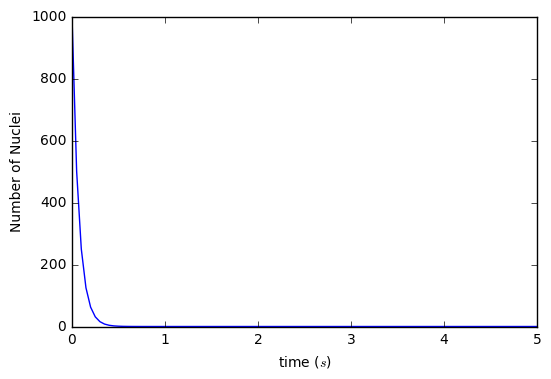

In [3]:
b = uranium_decay(number_of_nuclei=1000, time_constant=0.1)
b.calculate()
b.show_results()

# 1.4 Testing your program

Checking a program is not always a trivial task, but there are some general guidelines.

- Does the output look reasonable?

- Does your program agree with any exact results that are available?

In [59]:
from math import *
class exact_results_check(uranium_decay):
    def show_results(self):
        self.et = []
        for i in range(len(self.t)):
            temp = self.n_uranium[0] * exp(- self.t[i] / self.tau)
            self.et.append(temp)
        pl.plot(self.t, self.et)
        pl.plot(self.t, self.n_uranium, '*')
        pl.xlabel('time ($s$)')
        pl.ylabel('Number of Nuclei')
        pl.xlim(0, self.time)
        pl.show()

Initial number of nuclei -> 100
Time constant -> 5
time step ->  0.2
total time ->  5


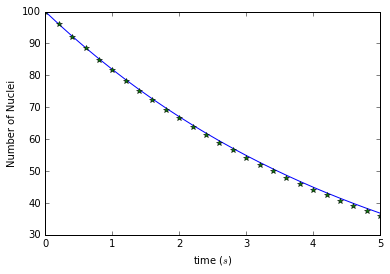

In [60]:
b = exact_results_check(number_of_nuclei=100, time_constant=5, time_step=0.2)
b.calculate()
b.show_results()

- Always check that your program gives the same answer for different "step sizes."

In [61]:
class diff_step_check(uranium_decay):
    def show_results(self, style = 'b'):
        pl.plot(self.t, self.n_uranium, style)
        pl.xlabel('time ($s$)')
        pl.ylabel('Number of Nuclei')
        pl.xlim(0, self.time)

Initial number of nuclei -> 100
Time constant -> 2
time step ->  0.25
total time ->  5
Initial number of nuclei -> 100
Time constant -> 2
time step ->  0.05
total time ->  5


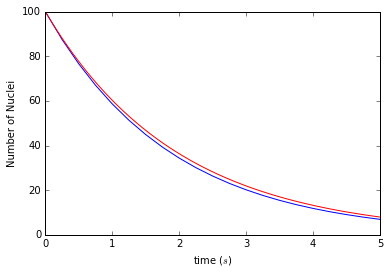

In [67]:
from pylab import *
b = diff_step_check(number_of_nuclei=100, time_constant=2, time_step=0.25)
b.calculate()
b.show_results()
c = diff_step_check(number_of_nuclei=100, time_constant=2, time_step=0.05)
c.calculate()
c.show_results('r')
show()

# 1.5 Numerical considerations

- In this book our emphasis will be on the physics, rather than the numerical method.

- There are many different algorithms, and which is the best one?

- *approximation* used to estimate the solution of the differential equation

- Errors are also produced by the finite numerical precision in any programming language -- *round-off errors*

### Questions of "discretization"

- How do we know that the erros introduced by this discreteness are negligible?

- How do we choose the value of such a step size for a calculation?

In Euler method, terms of order $(\Delta t)^2$ are dropped in each step, and the number of times steps is $t/\Delta t$. Hence, we expect the difference between the numerical (Euler) and exact results to be of order $\Delta t$.

- If there are no exact results, what can we do?

# 1.6 Programming guidelines and philosophy?

- Program structure

- Use descriptive names

- Use comment statements

- Sacrifice (almost) everything for clarity

- Take time to make graphical output as clear as possible